<a href="https://colab.research.google.com/github/Tomjaz/mnist_using_cnn/blob/main/mnist_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
X = np.array([1, 2, 3, 4])
X


array([1, 2, 3, 4])

In [5]:
X = np.array([1, 2, 3, 4,5,6,7,8,9]).reshape(-1, 1)
X

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [6]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)

In [9]:
print("shape of training data ",X_train.shape)
print("shape of testing data ",X_test.shape)

shape of training data  (60000, 28, 28)
shape of testing data  (10000, 28, 28)


In [11]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)


In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
type(y_train[0])

numpy.uint8

In [15]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

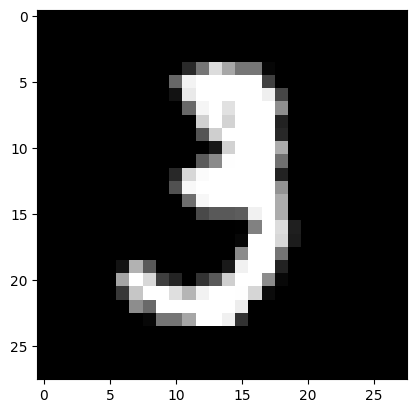

In [22]:
import matplotlib.pyplot as plt
plt.imshow(X_train[10],cmap="gray")

In [29]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
model=Sequential()
input_layer=Dense(32,input_shape=(28,28,1))
model.add(input_layer)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
conv_layer1=Conv2D(32,kernel_size=(3,3),activation='relu')
model.add(conv_layer1)

In [26]:
conv_lyer2=Conv2D(64,kernel_size=(3,3),activation='relu')
model.add(conv_lyer2)

In [27]:
pool_layer=MaxPooling2D(pool_size=(2,2))
model.add(pool_layer)

In [30]:
drop_layer=Dropout(0.25)
model.add(drop_layer)

In [31]:
flat_layer=Flatten()
model.add(flat_layer)

In [32]:
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

In [33]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.8444 - loss: 7.9819 - val_accuracy: 0.9196 - val_loss: 0.2891
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - accuracy: 0.9092 - loss: 0.3210 - val_accuracy: 0.9211 - val_loss: 0.2903
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9052 - loss: 0.3347 - val_accuracy: 0.9051 - val_loss: 0.3724
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9025 - loss: 0.3486 - val_accuracy: 0.9087 - val_loss: 0.3149
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.8999 - loss: 0.3674 - val_accuracy: 0.9129 - val_loss: 0.3818
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.8994 - loss: 0.3808 - val_accuracy: 0.9160 - val_loss: 0.3167
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.8980 - loss: 0.3911 - val_accuracy: 0.8969 - val_loss: 0.3685
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9047 -

In [35]:
val_loss,val_acc=model.evaluate(X_test,y_test)
val_loss,val_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9044 - loss: 0.4101


(0.36948928236961365, 0.9174000024795532)

In [39]:
arr=model.predict(X_train[100].reshape(1,28,28,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [40]:
arr

array([[1.4891165e-07, 6.2810152e-08, 4.7169882e-04, 6.6974721e-06,
        1.0110119e-04, 9.6937358e-01, 1.5699964e-04, 1.0998107e-08,
        2.3279097e-02, 6.6105402e-03]], dtype=float32)

In [41]:
np.argmax(arr)

5

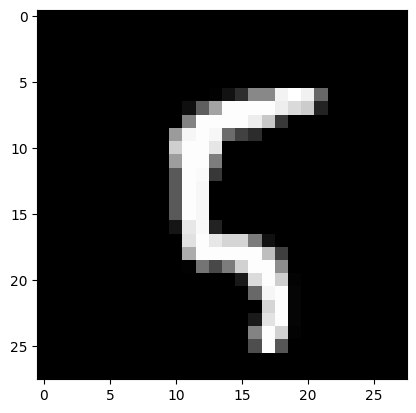

In [42]:
plt.imshow(X_train[100],cmap="gray")